In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q -c conda-forge cartopy
import cartopy
cartopy.__version__

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
 

ImportError: ignored

In [1]:
from google.colab import drive
from matplotlib import font_manager,rc
import os
drive.mount('/content/drive')
print(os.getcwd())
input_path=os.getcwd()+'/drive/MyDrive/Py/corab/input_data/'
output_path=os.getcwd()+'/drive/MyDrive/Py/corab/output_data/'
rc('font', family='NanumBarunGothic')

Mounted at /content/drive
/content


In [2]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12, 12)

/usr/local/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
dataFile = input_path+'pgbh00.gdas.1993031412.nc'
#Open the dataset and print out metadeta
ds = xr.open_dataset(dataFile)
print (ds)
#데이터 세트에 4개의 좌표(시간, 위도, 위도 및 압력)와 6개의 변수가 있음을 알 수 있습니다. 압력 좌표가 파스칼 단위임을 알 수 있습니다. 100으로 나누어 hPa로 매우 쉽게 변환 할 수 있으며, 이는 관련된 모든 데이터에 적용됩니다.

<xarray.Dataset>
Dimensions:                  (time: 1, lat: 201, lon: 720, pressure: 37)
Coordinates:
  * time                     (time) datetime64[ns] 1993-03-14T12:00:00
  * lat                      (lat) float64 90.0 89.5 89.0 ... -9.0 -9.5 -10.0
  * lon                      (lon) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * pressure                 (pressure) float64 1e+05 9.75e+04 ... 200.0 100.0
Data variables:
    Pressure_reduced_to_MSL  (time, lat, lon) float32 ...
    Absolute_vorticity       (time, pressure, lat, lon) float32 ...
    Geopotential_height      (time, pressure, lat, lon) float32 ...
    Temperature              (time, pressure, lat, lon) float32 ...
    U-component_of_wind      (time, pressure, lat, lon) float32 ...
    V-component_of_wind      (time, pressure, lat, lon) float32 ...
Attributes:
    Conventions:                  CF-1.0
    Originating_center:           US National Weather Service (NCEP) subcente...
    Generating_Process_or_Model:  Foreca

In [4]:
ds['pressure'] = ds['pressure']/100 #압력 좌표가 파스칼 단위임을 알 수 있습니다. 100으로 나누어 hPa로 매우 쉽게 변환 할 수 있으며, 이는 관련된 모든 데이터에 적용됩니다.

In [5]:
ds['pressure']

<xarray.DataArray 'pressure' (pressure: 37)>
array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,  775.,
        750.,  700.,  650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,
        250.,  225.,  200.,  175.,  150.,  125.,  100.,   70.,   50.,   30.,
         20.,   10.,    7.,    5.,    3.,    2.,    1.])
Coordinates:
  * pressure  (pressure) float64 1e+03 975.0 950.0 925.0 ... 5.0 3.0 2.0 1.0

먼저 500hPa 높이와 절대 소용돌이를 플로팅해 보겠습니다. 매핑을 위해 위도/경도 좌표를 포함하여 몇 가지 필요한 필드를 가져옵니다. xarray의 좌표 값을 인덱싱하려면 다음 명령을 사용하십시오. 위치(0부터 시작)를 기준으로 인덱싱하려면 를 사용합니다. 이 경우 시간 값이 하나만 있으므로 를 선택합니다..sel,isel,time=0

In [6]:
lat = ds['lat']
lon = ds['lon']
hght = ds['Geopotential_height'].sel(pressure=500).isel(time=0)
avor = ds['Absolute_vorticity'].sel(pressure=500).isel(time=0)

카토피로 매핑
Cartopy는 매핑을 매우 직관적이고 쉽게 만듭니다! 먼저 좌표 참조 시스템 ()을 정의하고 사용 가능한 투영 중에서 투영을 선택합니다. 그런 다음 그림을 만들고 선택한 투영 정보(이 경우 Lambert 등각 원뿔형 투영)를 전달하여 GeoAxes 인스턴스로 알려진 것을 만듭니다. 여기에서 모든 데이터를 매핑합니다. set_extent 사용하여 특정 위도/경도 상자를 확대할 수 있습니다.ccrs

그런 다음 토지 배경, 호수, 국가/주/지방 경계 등을 포함한 다양한 기능을 지도에 빠르게 추가할 수 있습니다.

여기에서는이 모든 것을 실행할 때마다이 코드를 모두 복사 / 붙여 넣을 필요없이 플롯 할 배경 맵이있는 그림을 만들고 반환하는 함수로 설정했습니다.plotMap()

일부 기능에 인수를 추가했습니다. matplotlib에 플롯의 다른 부분을 기준으로 특징을 그릴 위치를 알려주며, 0은 맨 아래 레이어이고 값은 증가할수록 그림의 최상위 레이어에 더 가깝습니다.zorderzorder

In [7]:
#그림을 그리기 위한 함수를 만든다.
def plotMap(): 
    #지도 투영법을 설정함
    proj = ccrs.LambertConformal(central_longitude=-97.0,central_latitude=53, standard_parallels=[53])
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    #Zoom in
    ax.set_extent([-45, -155, 10, 90])
    
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS, zorder=10)
    ax.add_feature(cfeature.COASTLINE, zorder=10)

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    
    #Add lat/lon gridlines every 20° to the map
    ax.gridlines(xlocs=np.arange(0,361,20), ylocs=np.arange(-80,90,20)) 
    
    return fig, ax

이제 데이터를 플로팅해 보겠습니다! 우리는 먼저 배경지도와 그림을 얻기 위해 전화합니다. 그런 다음 높이 윤곽선의 간격을 지정합니다. numpy의 함수를 사용하여 60m마다 4320에서 6000m까지의 등고선 범위를 선택합니다 (6 댐, 500-hPa의 표준). 높이 필드는 위의 압력 좌표를 변환한 방식으로 미터에서 데카미터로 쉽게 변환할 수 있습니다. 실행 중이며 데이터 세트의 500hPa 높이에 대한 최소 및 최대 값이 플롯하기로 선택한 범위 내에 있음을 보여줍니다.plotMap()arangehght.min()hght.max()

주목해야 할 핵심 사항은 호출이 끝날 때의 인수입니다. 이것이 matplotlib가 위도 / 경도 좌표의 변수를지도 투영 좌표로 변환하도록 지시하는 것입니다.transformcontour

그런 다음 채워진 등고선에 절대 소용돌이를 표시합니다. Matplotlib에는 선택할 수 있는 컬러맵이 많이 있습니다. 여기서는 YlOrRd (노란색-주황색-빨간색)를 사용합니다.

/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

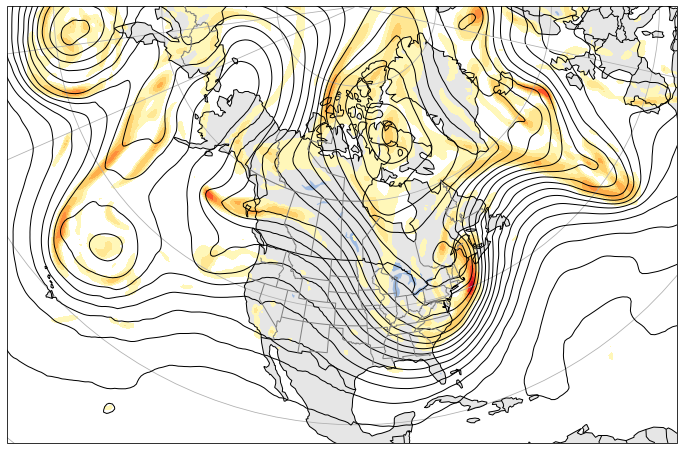

In [9]:
#Get a new background map figure
fig, ax = plotMap()

#Plot the 500-hPa height contours on the map, in black, with line width 1, and plot it above everything else.
hght_levels = np.arange(4320,6000,60)
ax.contour(lon, lat,hght, colors='k', levels=hght_levels, linewidths=1, zorder=3, transform = ccrs.PlateCarree())

#Now plot absolute vorticity as filled contours underneath height field, only values above 1.5e-4 s-1, 
# and use the YlOrRd colormap.
avor_levels = np.linspace(15e-5,60e-5, 10)
avor_contour = ax.contourf(lon, lat, avor, levels = avor_levels,  
                           cmap=plt.cm.YlOrRd, zorder=2, transform = ccrs.PlateCarree())


대! 필드는 다소 시끄러울 수 있으므로(특히 소용돌이) 데이터에 가우스 필터를 사용하여 맵을 약간 매끄럽게 할 수 있습니다(예: GEMPAK의 GWFS 함수). 이를 위해 SciPy의 Guassian 필터 기능을 사용할 수 있습니다.

또한 를 사용하여 윤곽선에 레이블을 추가할 수 있습니다. 소수가 나타나지 않도록 레이블을 정수 ()로 포맷 할 수 있습니다.clabelfmt='%1i'

가우시안 필터 사용 가능

In [11]:
lay=avor_levels*10**5

Text(0.5, 1.0, '500-hPa Heights, Absolute Vorticity $10^{-5} s^{-1}$\n 1993-03-14 12UTC')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


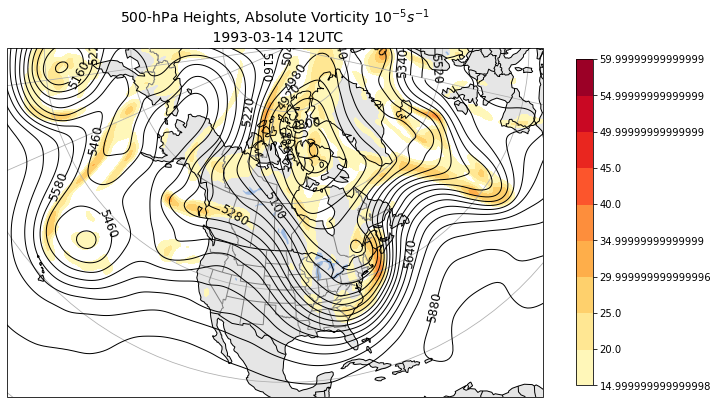

In [12]:
#Import scipy.ndimage to get the gaussian_filter function
import scipy.ndimage as ndimage

#Plot a new figure and map axes
fig, ax = plotMap()

#Smooth and re-plot the vorticity field
avor_smooth = ndimage.gaussian_filter(avor, sigma=1.5, order=0)
avor_contour = ax.contourf(lon, lat, avor_smooth, levels = avor_levels, zorder=2,  
                           cmap=plt.cm.YlOrRd, transform = ccrs.PlateCarree())

#Smooth and re-plot the height field
hght_smooth = ndimage.gaussian_filter(hght, sigma=3, order=0)
hght_contour = ax.contour(lon, lat, hght_smooth, levels=hght_levels, linewidths=1, colors='k',  
                          zorder=11,transform = ccrs.PlateCarree())

#Plot contour labels for the heights, leaving a break in the contours for the text (inline=True)
plt.clabel(hght_contour,  hght_levels, inline=True, fmt='%1i', fontsize=12)
#Create a colorbar and shrink it down a bit.
cb = plt.colorbar(avor_contour, shrink=0.5)
#Change the tick labels
cb.set_ticklabels(lay)

#Set the title
ax.set_title('500-hPa Heights, Absolute Vorticity $10^{-5} s^{-1}$\n 1993-03-14 12UTC', fontsize=14)

에 대한 컬러바를 추가해 보겠습니다. 실제 값에는 선행 0이 많기 때문에 색상 막대 눈금 레이블을 시각적으로 좀 더 매력적으로 만들고 싶습니다. 이를 수행하는 방법에는 여러 가지가 있습니다. 한 가지 빠른 방법은 실제로 위의 값인 눈금 레이블 값에 다음과 같이 곱하는 것입니다. avoravor_levels105
제목도 설정해 보겠습니다. 수학적 표기법을 얻으려면 두 $ 사이에 LaTeX와 같은 구문을 사용할 수 있습니다. 줄 바꿈 문자 \n을 사용하여 두 번째 줄을 추가합니다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


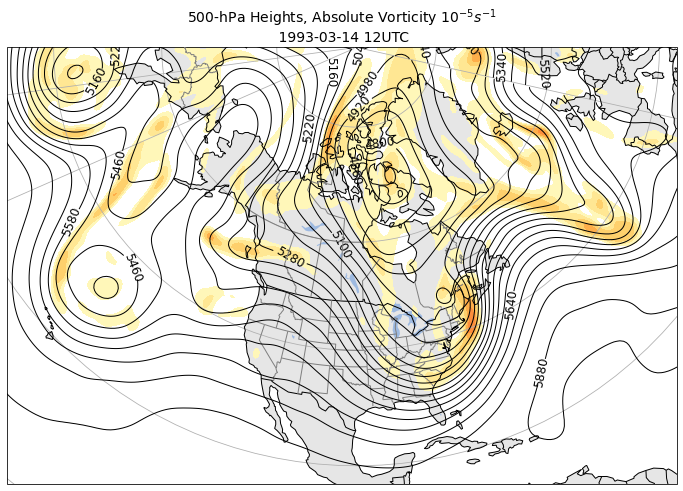

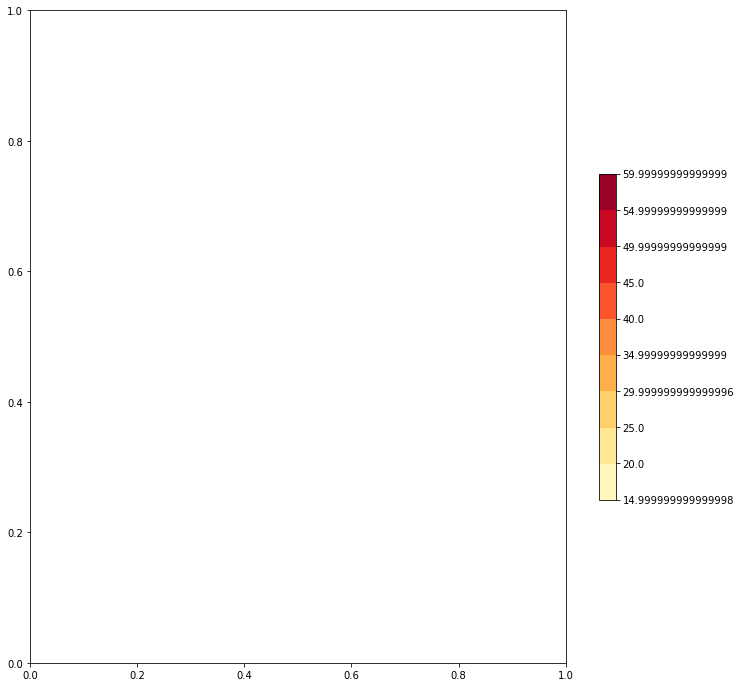

In [ ]:
#Create a colorbar and shrink it down a bit.
cb = plt.colorbar(avor_contour, shrink=0.5)
#Change the tick labels
cb.set_ticklabels(avor_levels*10**5)

#Set the title
ax.set_title('500-hPa Heights, Absolute Vorticity $10^{-5} s^{-1}$\n 1993-03-14 12UTC', fontsize=14)
fig

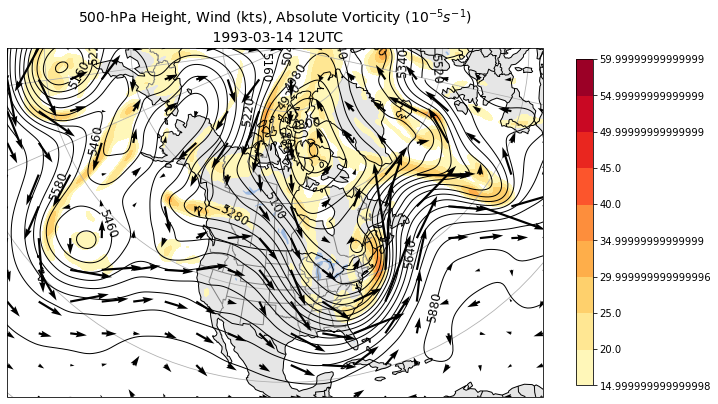

In [ ]:
#Import scipy.ndimage to get the gaussian_filter function
import scipy.ndimage as ndimage

#Plot a new figure and map axes
fig, ax = plotMap()

#Smooth and re-plot the vorticity field
avor_smooth = ndimage.gaussian_filter(avor, sigma=1.5, order=0)
avor_contour = ax.contourf(lon, lat, avor_smooth, levels = avor_levels, zorder=2,  
                           cmap=plt.cm.YlOrRd, transform = ccrs.PlateCarree())

#Smooth and re-plot the height field
hght_smooth = ndimage.gaussian_filter(hght, sigma=3, order=0)
hght_contour = ax.contour(lon, lat, hght_smooth, levels=hght_levels, linewidths=1, colors='k',  
                          zorder=11,transform = ccrs.PlateCarree())

#Plot contour labels for the heights, leaving a break in the contours for the text (inline=True)
plt.clabel(hght_contour,  hght_levels, inline=True, fmt='%1i', fontsize=12)
#Create a colorbar and shrink it down a bit.
cb = plt.colorbar(avor_contour, shrink=0.5)
#Change the tick labels
cb.set_ticklabels(lay)

#Set the title
ax.set_title('500-hPa Height, Wind (kts), Absolute Vorticity ($10^{-5} s^{-1}$)\n 1993-03-14 12UTC', fontsize=14)

#Get the wind components
urel = ds['U-component_of_wind'].sel(pressure=500).isel(time=0).values*1.944
vrel = ds['V-component_of_wind'].sel(pressure=500).isel(time=0).values*1.944

#Plot the barbs
ax.quiver(lon, lat, urel, vrel, regrid_shape=12, zorder=20, transform=ccrs.PlateCarree()) # quiver화살표, barbs풍향풍속그림, streamplot 유선